In [1]:
from utils import copy_latest_csv

In [ ]:
# 考虑分析随着 batch size 变化, 调度器的 throughput 的变化
# 长的prefill, 长的decode, 高的rate(要确保达到计算极限，这样才会显出差别)
prompt_types = [
    {"type": "type1", "prefill": 50, "decode": 156, "arrival_rate": 1670},
    {"type": "type2", "prefill": 100, "decode": 171, "arrival_rate": 310},
]
num_requests = 10000

In [ ]:
# 首先测试 modified 在 limit = (100, 2200, 100) 的表现
# limit = 2300 的时候爆了

In [ ]:
limit_to_batch_size = {
    100:99, 
    200:238,
    300:205,
    400:379,
    500:396,
    600:568,
    700:586,
    800:758,
    900:777,
    1000:950,
    1100:951,
    1200:1106,
    1300:1107,
    1400:1263,
    1500:1264,
    1600:1418,
    1700:1419,
    1800:1577,
    1900:1732,
    2000:1733,
    2100:2057,
    2200:2058,
    }

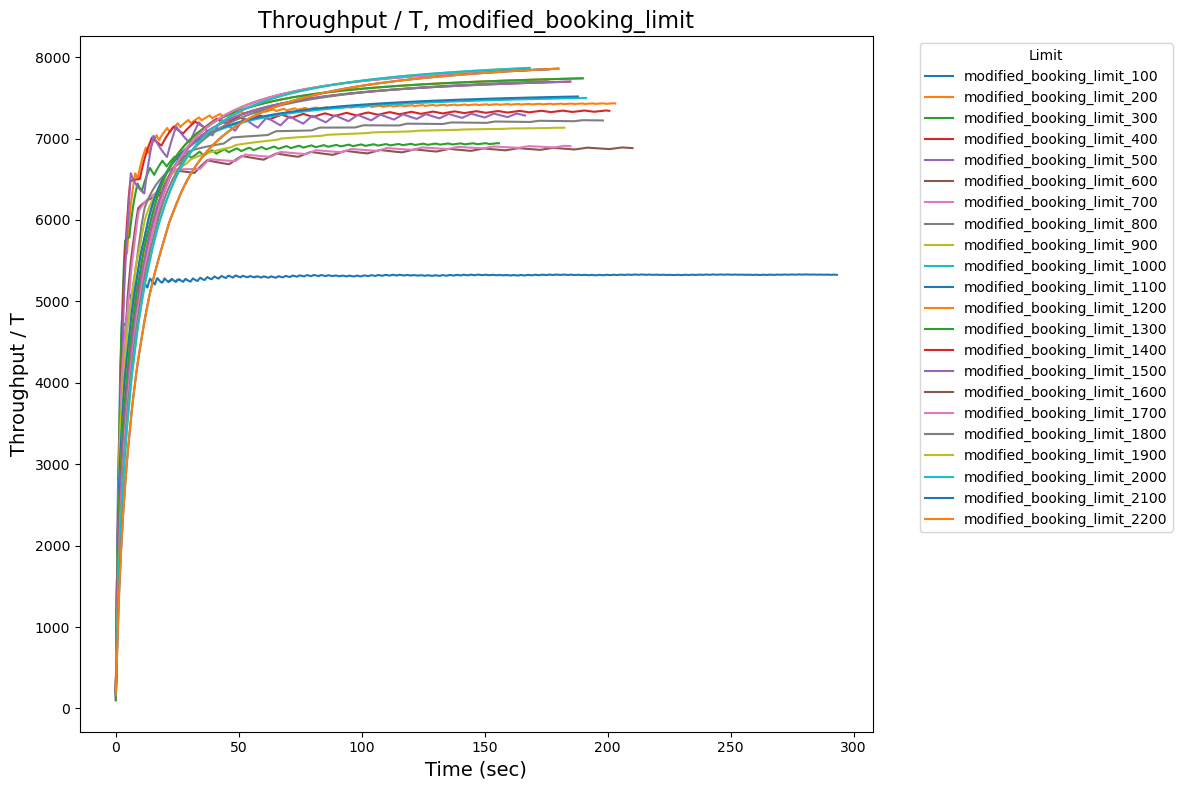

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 指定vllm文件夹的路径
vllm_folder = './modified_booking_limit'

# 获取vllm文件夹下所有符合条件的CSV文件
csv_files = [f for f in os.listdir(vllm_folder) if f.startswith('throughput_modified_booking_limit_limit_') and f.endswith('.csv')]

# 按照batch_size从小到大排序
csv_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

# 创建一个新的图表
plt.figure(figsize=(12, 8))

# 遍历每个CSV文件
for file in csv_files:
    # 从文件名中提取batch_size
    batch_size = file.split('_')[-1].split('.')[0]
    
    # 使用pandas读取CSV文件
    file_path = os.path.join(vllm_folder, file)
    df = pd.read_csv(file_path)
    
    # 计算 T时刻的throughput / T
    df['throughput_per_T'] = df['throughput'] / df['Time (sec)']
    
    # 绘制throughput_per_T随时间变化的曲线
    plt.plot(df['Time (sec)'], df['throughput_per_T'], label=f'modified_booking_limit_{batch_size}')

# 添加图例
plt.legend(title='Limit', bbox_to_anchor=(1.05, 1), loc='upper left')

# 添加标题和标签
plt.title('Throughput / T, modified_booking_limit', fontsize=16)
plt.xlabel('Time (sec)', fontsize=14)
plt.ylabel('Throughput / T', fontsize=14)

# 调整布局，防止图例遮挡
plt.tight_layout()

# 显示图表
plt.show()

throughput_sarathi_batch_size_1732.csv


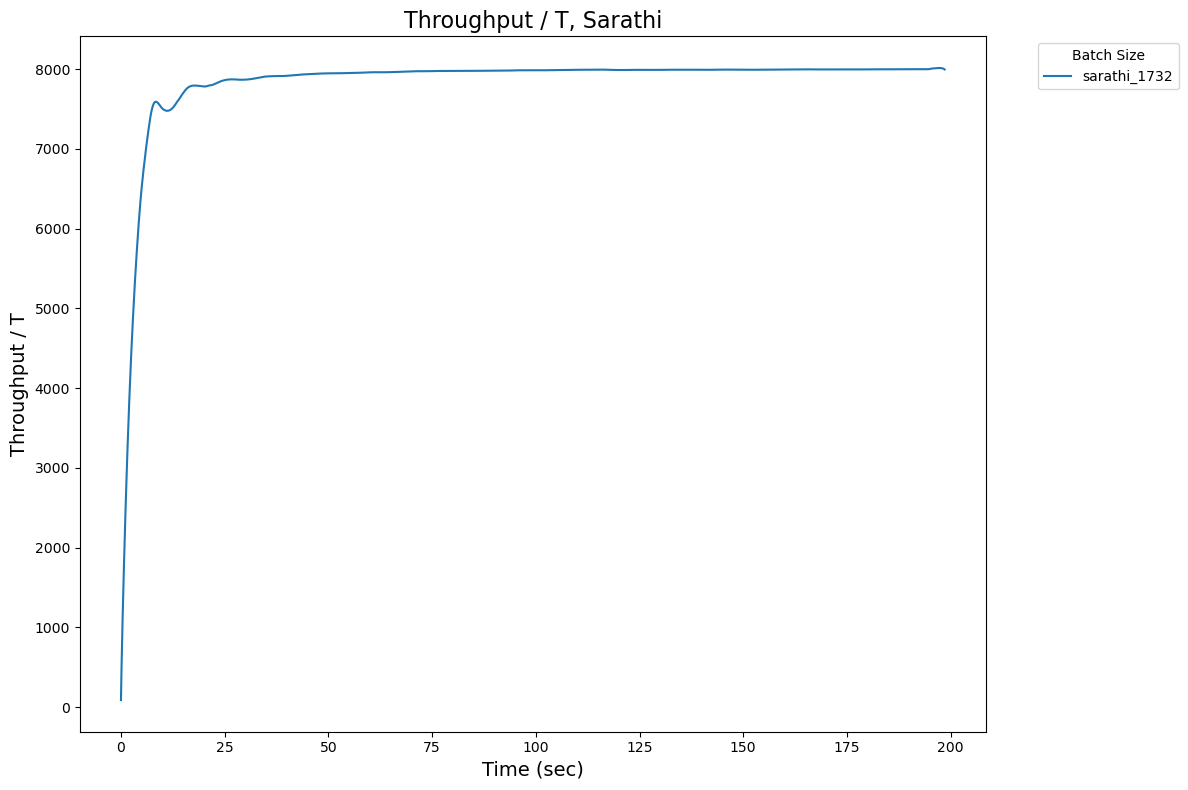

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 指定vllm文件夹的路径
vllm_folder = '/Users/luogan/Code/vidur_or/results_analysis/test10__long_decode_high_rate/sarathi'

# 获取vllm文件夹下所有符合条件的CSV文件
csv_files = [f for f in os.listdir(vllm_folder) if f.startswith('throughput_sarathi_batch_size_') and f.endswith('.csv')]

# 按照batch_size从小到大排序
csv_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

# 创建一个新的图表
plt.figure(figsize=(12, 8))

# 遍历每个CSV文件
for file in csv_files:
    print(file)
    # 从文件名中提取batch_size
    batch_size = file.split('_')[-1].split('.')[0]
    
    # 使用pandas读取CSV文件
    file_path = os.path.join(vllm_folder, file)
    df = pd.read_csv(file_path)
    
    # 计算 T时刻的throughput / T
    df['throughput_per_T'] = df['throughput'] / df['Time (sec)']
    
    # 绘制throughput_per_T随时间变化的曲线
    plt.plot(df['Time (sec)'], df['throughput_per_T'], label=f'sarathi_{batch_size}')

# 添加图例
plt.legend(title='Batch Size', bbox_to_anchor=(1.05, 1), loc='upper left')

# 添加标题和标签
plt.title('Throughput / T, Sarathi', fontsize=16)
plt.xlabel('Time (sec)', fontsize=14)
plt.ylabel('Throughput / T', fontsize=14)

# 调整布局，防止图例遮挡
plt.tight_layout()

# 显示图表
plt.show()

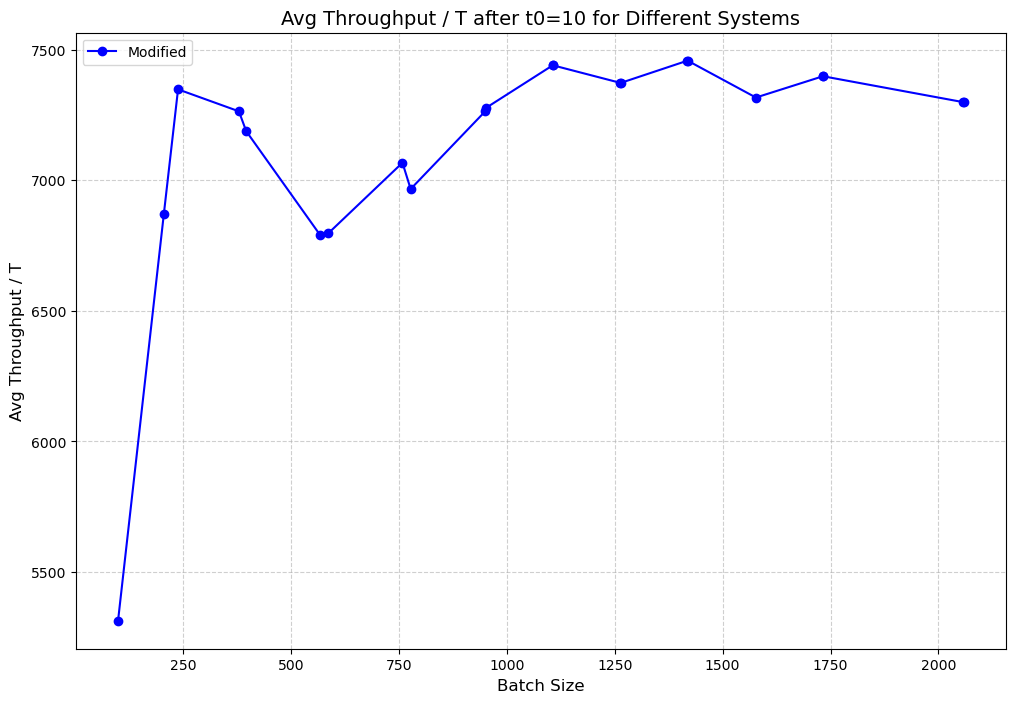

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 指定文件夹的路径
folder_info = [
    {
        'name': 'Modified',
        'path': './modified_booking_limit',
        'pattern': 'throughput_modified_booking_limit_limit_*.csv',
        'key': 'Limit'
    },
    {
        'name': 'VLLM',
        'path': './vllm',
        'pattern': 'throughput_vllm_batch_size_*.csv',
        'key': 'batch_size'
    },
    {
        'name': 'Sarathi',
        'path': './sarathi',
        'pattern': 'throughput_sarathi_batch_size_*.csv',
        'key': 'batch_size'
    }
]

# 设置 t0 的值
t0 = 10  # 你可以修改为合适的时间点

# 存储所有数据
all_data = {
    'batch_sizes': {},  # 用于存储 batch_size 和对应的 throughput_per_T 平均值
    'mean_throughputs': {},
    'labels': []
}

# 定义函数用于提取 batch_size
def extract_batch_size(file_name, pattern, key):
    try:
        if pattern.startswith('throughput_modified_booking_limit_limit_'):
            # Split the file name and extract the last part before .csv
            parts = file_name.split('_')
            batch_size = int(parts[-1].split('.')[0])
            return batch_size
        elif 'batch_size' in pattern:
            # Split the file name using '_batch_size_'
            parts = file_name.split('_batch_size_')
            if len(parts) >= 2:
                batch_part = parts[-1].split('.')[0]
                return int(batch_part)
        return None
    except ValueError:
        return None

# 遍历每个文件夹
for info in folder_info:
    folder_name = info['name']
    folder_path = info['path']
    pattern = info['pattern']
    
    # 获取符合条件的CSV文件
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    csv_files = [f for f in csv_files if f.startswith(pattern.split('*')[0])]
    
    # 提取并过滤有效的 batch_size 和文件
    batch_sizes = []
    valid_csv_files = []
    for f in csv_files:
        batch_size = extract_batch_size(f, pattern, info['key'])
        if batch_size is not None:
            valid_csv_files.append(f)
            batch_sizes.append(batch_size)
    
    # 按照 batch_size 从小到大排序
    valid_csv_files = [file for _, file in sorted(zip(batch_sizes, valid_csv_files))]
    sorted_batch_sizes = sorted(batch_sizes)
    
    # 重新复制排序后的 batch_sizes
    sorted_batch_sizes = []
    for file in valid_csv_files:
        batch_size = extract_batch_size(file, pattern, info['key'])
        sorted_batch_sizes.append(batch_size)
    
    # 存储 batch_size 和对应的 throughput_per_T 平均值
    average_throughput_per_T = []
    
    # 遍历每个CSV文件
    for idx, file in enumerate(valid_csv_files):
        batch_size = sorted_batch_sizes[idx]
        
        # 使用 pandas 读取 CSV 文件
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        
        # 检查列是否存在，如 'throughput' 和 'Time (sec)'
        if 'throughput' not in df.columns or 'Time (sec)' not in df.columns:
            print(f"文件 {file} 缺少必要的列（'throughput' 或 'Time (sec)），跳过此文件")
            continue
        
        # 计算 throughput_per_T
        if df['Time (sec)'].isnull().all() or df['throughput'].isnull().all():
            print(f"文件 {file} 的 'Time (sec)' 或 'throughput' 列包含无效值，跳过此文件")
            continue
        df['throughput_per_T'] = df['throughput'] / df['Time (sec)']
        
        # 过滤出 t >= t0 的数据
        df_filtered = df[df['Time (sec)'] >= t0]
        
        # 确保没有 NaN 或 0 数据
        df_filtered = df_filtered[df_filtered['throughput_per_T'].notnull() & (df_filtered['throughput_per_T'] > 0)]
        
        # 计算 t0 之后 throughput_per_T 的平均值
        avg_throughput = df_filtered['throughput_per_T'].mean()
        
        # 存储 batch_size 和 平均值
        average_throughput_per_T.append(avg_throughput)
    
    # 存储数据
    all_data['batch_sizes'][folder_name] = sorted_batch_sizes
    all_data['mean_throughputs'][folder_name] = average_throughput_per_T
    all_data['labels'].append(folder_name)

# 创建折线图
plt.figure(figsize=(12, 8))

# 绘制每组数据
for folder_name in all_data['batch_sizes']:
    batch_sizes = all_data['batch_sizes'][folder_name]
    throughputs = all_data['mean_throughputs'][folder_name]
    
    # 确保通过数据有效（避免曲线过短）
    if len(batch_sizes) >= 2 and len(throughputs) >= 2:
        # 选择不同的颜色和标记
        if folder_name == 'Modified':
            plt.plot(batch_sizes, throughputs, marker='o', linestyle='-', color='b', label=folder_name)
        elif folder_name == 'VLLM':
            plt.plot(batch_sizes, throughputs, marker='s', linestyle='--', color='r', label=folder_name)
        elif folder_name == 'Sarathi':
            plt.plot(batch_sizes, throughputs, marker='^', linestyle='-.', color='g', label=folder_name)

# 添加标题和标签
plt.title(f'Avg Throughput / T after t0={t0} for Different Systems', fontsize=14)
plt.xlabel('Batch Size', fontsize=12)  # 横轴改为 Batch Size
plt.ylabel('Avg Throughput / T', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left')  # 调整图例位置

# 显示图表
plt.show()

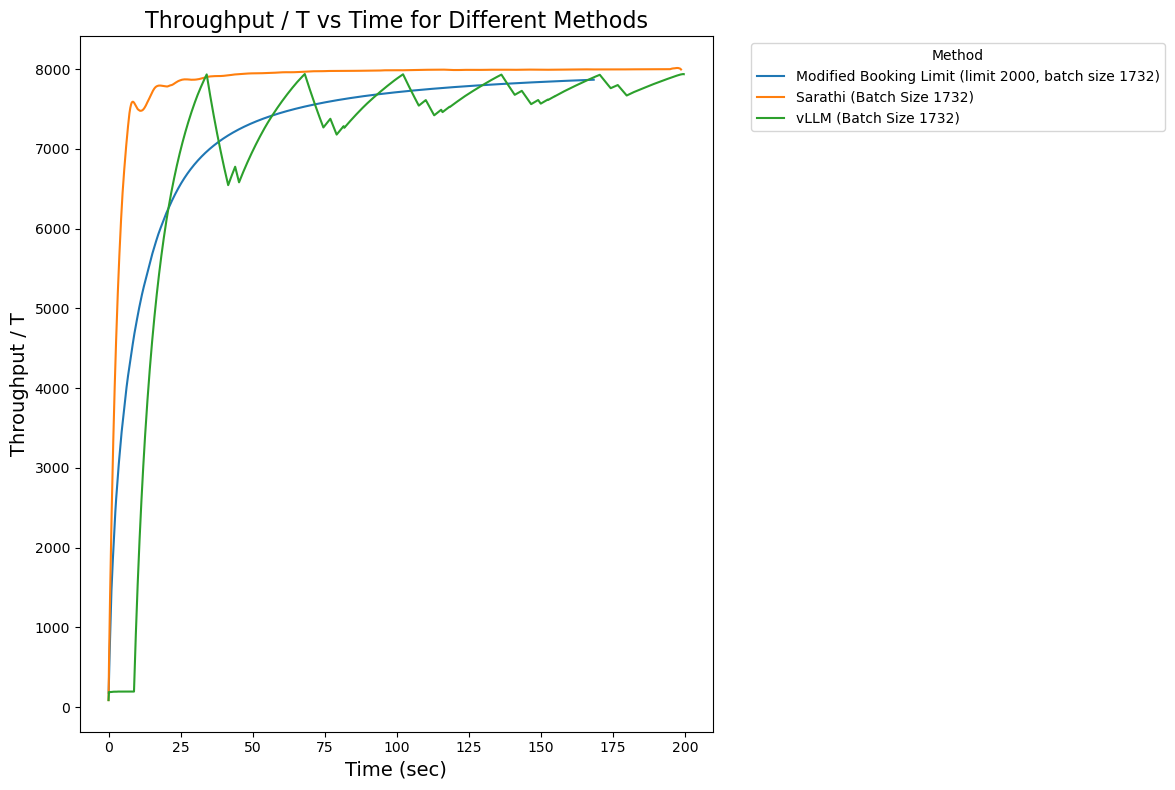

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 定义文件路径
file_paths = [
    '/Users/luogan/Code/vidur_or/results_analysis/test10__long_decode_high_rate/modified_booking_limit/throughput_modified_booking_limit_limit_2000.csv',
    '/Users/luogan/Code/vidur_or/results_analysis/test10__long_decode_high_rate/sarathi/throughput_sarathi_batch_size_1732.csv',
    '/Users/luogan/Code/vidur_or/results_analysis/test10__long_decode_high_rate/vllm/throughput_vllm_batch_size_1732.csv'
]

# 定义每条曲线的标签
labels = [
    'Modified Booking Limit (limit 2000, batch size 1732)',
    'Sarathi (Batch Size 1732)',
    'vLLM (Batch Size 1732)'
]

# 创建一个新的图表
plt.figure(figsize=(12, 8))

# 遍历每个文件
for file_path, label in zip(file_paths, labels):
    # 使用pandas读取CSV文件
    df = pd.read_csv(file_path)
    
    # 计算 T时刻的throughput / T
    df['throughput_per_T'] = df['throughput'] / df['Time (sec)']
    
    # 绘制throughput_per_T随时间变化的曲线
    plt.plot(df['Time (sec)'], df['throughput_per_T'], label=label)

# 添加图例
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

# 添加标题和标签
plt.title('Throughput / T vs Time for Different Methods', fontsize=16)
plt.xlabel('Time (sec)', fontsize=14)
plt.ylabel('Throughput / T', fontsize=14)

# 调整布局，防止图例遮挡
plt.tight_layout()

# 显示图表
plt.show()

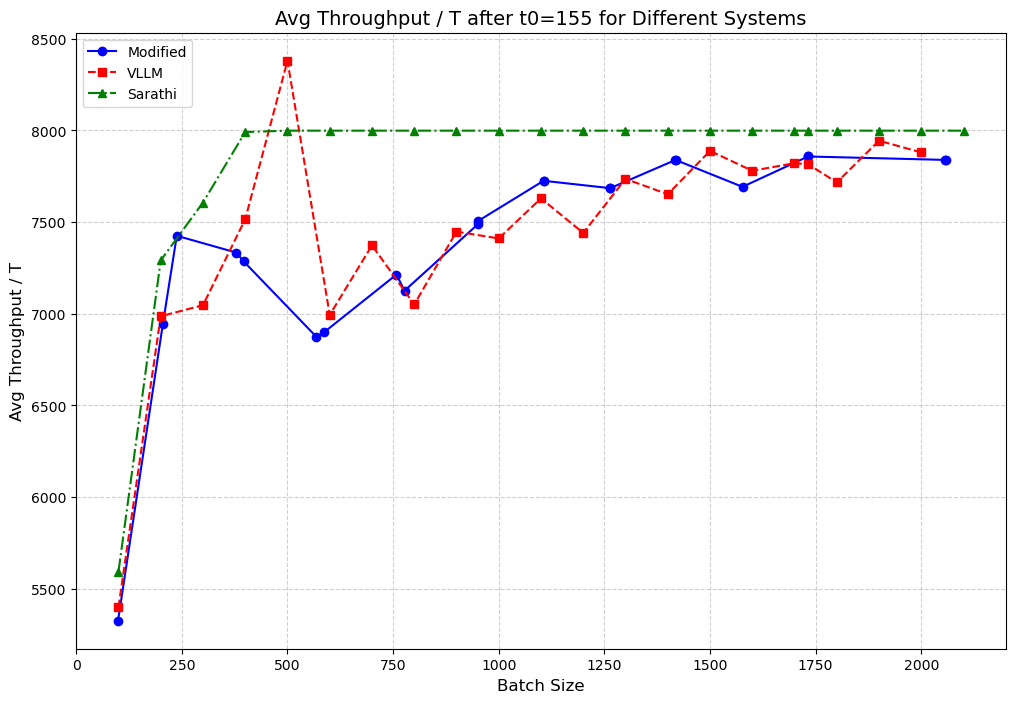

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 指定文件夹的路径
folder_info = [
    {
        'name': 'Modified',
        'path': './modified_booking_limit',
        'pattern': 'throughput_modified_booking_limit_limit_*.csv',
        'key': 'Limit'
    },
    {
        'name': 'VLLM',
        'path': './vllm',
        'pattern': 'throughput_vllm_batch_size_*.csv',
        'key': 'batch_size'
    },
    {
        'name': 'Sarathi',
        'path': './sarathi',
        'pattern': 'throughput_sarathi_batch_size_*.csv',
        'key': 'batch_size'
    }
]

# 设置 t0 的值
t0 = 155  # 你可以修改为合适的时间点

# 存储所有数据
all_data = {
    'batch_sizes': {},  # 用于存储 batch_size 和对应的 throughput_per_T 平均值
    'mean_throughputs': {},
    'labels': []
}

# 定义函数用于提取 batch_size
def extract_batch_size(file_name, pattern, key):
    try:
        if pattern.startswith('throughput_modified_booking_limit_limit_'):
            # Split the file name and extract the last part before .csv
            parts = file_name.split('_')
            batch_size = int(parts[-1].split('.')[0])
            return batch_size
        elif 'batch_size' in pattern:
            # Split the file name using '_batch_size_'
            parts = file_name.split('_batch_size_')
            if len(parts) >= 2:
                batch_part = parts[-1].split('.')[0]
                return int(batch_part)
        return None
    except ValueError:
        return None

# 遍历每个文件夹
for info in folder_info:
    folder_name = info['name']
    folder_path = info['path']
    pattern = info['pattern']
    
    # 获取符合条件的CSV文件
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    csv_files = [f for f in csv_files if f.startswith(pattern.split('*')[0])]
    
    # 提取并过滤有效的 batch_size 和文件
    batch_sizes = []
    valid_csv_files = []
    for f in csv_files:
        batch_size = extract_batch_size(f, pattern, info['key'])
        if batch_size is not None:
            valid_csv_files.append(f)
            batch_sizes.append(batch_size)
    
    # 按照 batch_size 从小到大排序
    valid_csv_files = [file for _, file in sorted(zip(batch_sizes, valid_csv_files))]
    sorted_batch_sizes = sorted(batch_sizes)
    
    # 重新复制排序后的 batch_sizes
    sorted_batch_sizes = []
    for file in valid_csv_files:
        batch_size = extract_batch_size(file, pattern, info['key'])
        sorted_batch_sizes.append(batch_size)
    
    # 存储 batch_size 和对应的 throughput_per_T 平均值
    average_throughput_per_T = []
    
    # 遍历每个CSV文件
    for idx, file in enumerate(valid_csv_files):
        batch_size = sorted_batch_sizes[idx]
        
        # 使用 pandas 读取 CSV 文件
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        
        # 检查列是否存在，如 'throughput' 和 'Time (sec)'
        if 'throughput' not in df.columns or 'Time (sec)' not in df.columns:
            print(f"文件 {file} 缺少必要的列（'throughput' 或 'Time (sec)），跳过此文件")
            continue
        
        # 计算 throughput_per_T
        if df['Time (sec)'].isnull().all() or df['throughput'].isnull().all():
            print(f"文件 {file} 的 'Time (sec)' 或 'throughput' 列包含无效值，跳过此文件")
            continue
        df['throughput_per_T'] = df['throughput'] / df['Time (sec)']
        
        # 过滤出 t >= t0 的数据
        df_filtered = df[df['Time (sec)'] >= t0]
        
        # 确保没有 NaN 或 0 数据
        df_filtered = df_filtered[df_filtered['throughput_per_T'].notnull() & (df_filtered['throughput_per_T'] > 0)]
        
        # 计算 t0 之后 throughput_per_T 的平均值
        avg_throughput = df_filtered['throughput_per_T'].mean()
        
        # 存储 batch_size 和 平均值
        average_throughput_per_T.append(avg_throughput)
    
    # 存储数据
    all_data['batch_sizes'][folder_name] = sorted_batch_sizes
    all_data['mean_throughputs'][folder_name] = average_throughput_per_T
    all_data['labels'].append(folder_name)

# 创建折线图
plt.figure(figsize=(12, 8))

# 绘制每组数据
for folder_name in all_data['batch_sizes']:
    batch_sizes = all_data['batch_sizes'][folder_name]
    throughputs = all_data['mean_throughputs'][folder_name]
    
    # 确保通过数据有效（避免曲线过短）
    if len(batch_sizes) >= 2 and len(throughputs) >= 2:
        # 选择不同的颜色和标记
        if folder_name == 'Modified':
            plt.plot(batch_sizes, throughputs, marker='o', linestyle='-', color='b', label=folder_name)
        elif folder_name == 'VLLM':
            plt.plot(batch_sizes, throughputs, marker='s', linestyle='--', color='r', label=folder_name)
        elif folder_name == 'Sarathi':
            plt.plot(batch_sizes, throughputs, marker='^', linestyle='-.', color='g', label=folder_name)

# 添加标题和标签
plt.title(f'Avg Throughput / T after t0={t0} for Different Systems', fontsize=14)
plt.xlabel('Batch Size', fontsize=12)  # 横轴改为 Batch Size
plt.ylabel('Avg Throughput / T', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left')  # 调整图例位置

# 显示图表
plt.show()